<a href="https://colab.research.google.com/github/divyagaurava/covid19_pneumonia_classification/blob/main/covid19_pneumonia_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


Clone Dataset

In [ ]:
! git clone https://github.com/education454/datasets


fatal: destination path 'datasets' already exists and is not an empty directory.


In [ ]:
import os
base_dir='/content/datasets/Data'
train_dir=os.path.join(base_dir,'train')
test_dir=os.path.join(base_dir,'test')
train_covid_dir = os.path.join(train_dir,'COVID19')
train_normal_dir = os.path.join(train_dir,'NORMAL')
test_covid_dir = os.path.join(test_dir,'COVID19')
test_normal_dir = os.path.join(test_dir,'NORMAL')

In [ ]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])



['COVID19(400).jpg', 'COVID19(147).jpg', 'COVID19(422).jpg', 'COVID19(213).jpg', 'COVID19(46).jpg', 'COVID19(545).jpg', 'COVID19(145).jpg', 'COVID19(283).jpg', 'COVID19(366).jpg', 'COVID19(133).jpg']
['NORMAL(1561).jpg', 'NORMAL(975).jpg', 'NORMAL(445).jpg', 'NORMAL(1499).jpg', 'NORMAL(66).jpg', 'NORMAL(1217).jpg', 'NORMAL(955).jpg', 'NORMAL(1309).jpg', 'NORMAL(344).jpg', 'NORMAL(1557).jpg']
['COVID19(439).jpg', 'COVID19(462).jpg', 'COVID-19 (865).jpg', 'COVID19(523).jpg', 'COVID19(197).jpg', 'COVID19(441).jpg', 'COVID19(419).jpg', 'COVID-19 (479).jpg', 'COVID19(415).jpg', 'COVID19(183).jpg']
['NORMAL(8).jpg', 'NORMAL(996).jpg', 'NORMAL(835).jpg', 'NORMAL(760).jpg', 'NORMAL(1120).jpg', 'NORMAL(377).jpg', 'NORMAL(654).jpg', 'NORMAL(49).jpg', 'NORMAL(136).jpg', 'NORMAL(356).jpg']


In [ ]:
print("train dataset covid images :",len(train_covid_names))
print("train dataset normal images :",len(train_normal_names))

print("test dataset covid images :",len(test_covid_names))
print("test dataset normal images :",len(test_normal_names))

print("Total train images :",len(train_covid_names+train_normal_names))
print("Total test images :",len(test_covid_names+test_normal_names))

train dataset covid images : 545
train dataset normal images : 1266
test dataset covid images : 167
test dataset normal images : 317
Total train images : 1811
Total test images : 484


['/content/datasets/Data/train/COVID19/COVID19(400).jpg', '/content/datasets/Data/train/COVID19/COVID19(147).jpg', '/content/datasets/Data/train/COVID19/COVID19(422).jpg', '/content/datasets/Data/train/COVID19/COVID19(213).jpg', '/content/datasets/Data/train/COVID19/COVID19(46).jpg', '/content/datasets/Data/train/COVID19/COVID19(545).jpg', '/content/datasets/Data/train/COVID19/COVID19(145).jpg', '/content/datasets/Data/train/COVID19/COVID19(283).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(1561).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(975).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(445).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1499).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(66).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1217).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(955).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1309).jpg']


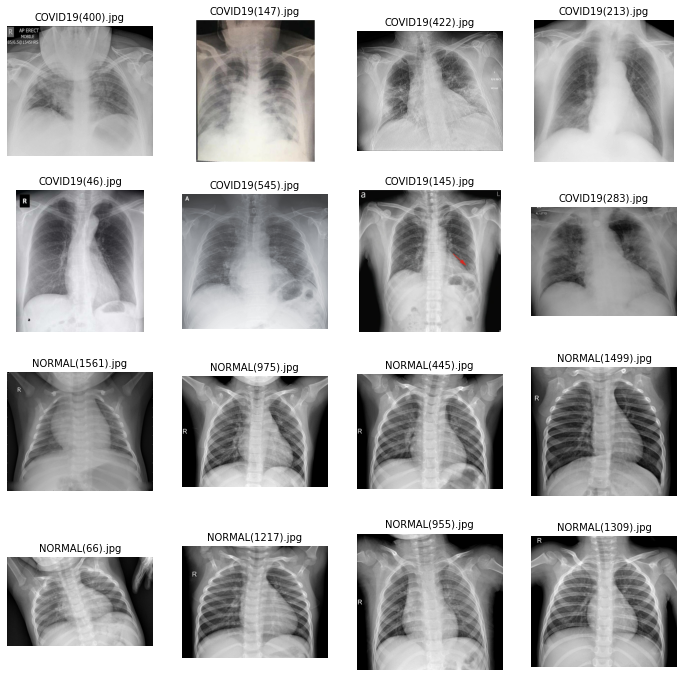

In [ ]:
import matplotlib.image as mpimg

#set the number of columns and rows 
nrows = 4
ncols = 4

#set the figure size 
fig = plt.gcf()
fig.set_size_inches(12,12)

#get the filenames from the covid and normal dir of the train dataset
next_covid_pic = [os.path.join(train_covid_dir,fname) for fname in train_covid_names[0:8]]
next_normal_pic = [os.path.join(train_normal_dir,fname) for fname in train_normal_names[0:8]]

#print the list
print(next_covid_pic)
print(next_normal_pic)

for i , img_path in enumerate(next_covid_pic+next_normal_pic):
  data = img_path.split('/',6)[6]
  sp =plt.subplot(nrows,ncols,i+1)
  sp.axis('off')
  img=mpimg.imread(img_path)
  sp.set_title(data,fontsize=10)
  plt.imshow(img,cmap='gray')

plt.show()


**Generating Training, validation and testing batches**

In [ ]:
#generator for our training data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

#generator for our validation data
validation_datagen = ImageDataGenerator(rescale = 1./255)

#generator for our test data
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    subset = 'training',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

validation_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    subset = 'validation',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

test_generator = train_datagen.flow_from_directory(test_dir,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

# BUILD CNN Model

In [ ]:
model = Sequential()

#add the convolutional layer
#filters size of filters, padding, activation_function, input_shape
model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(150,150,3)))
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#place a droupout layer
model.add(Dropout(0.5))
#add another convolutional layer
model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#place a droupout layer
model.add(Dropout(0.5))

#flattern the image to 1D array
model.add(Flatten())
#add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))
#place a dropout layer
#0.5 drop out rate is recommended, half input nodes will be dropout at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

### **Compile and train model**

In [ ]:
#compile the model
from tensorflow.keras.optimizers import Adam
model.compile(Adam(learning_rate = 0.001), loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#train the model
history = model.fit(train_generator,
                    epochs=30,
                    validation_data = validation_generator,
                    validation_steps = 10)

Epoch 1/30
46/46 [==============================] - 78s 1s/step - loss: 1.4359 - accuracy: 0.7336 - val_loss: 0.2892 - val_accuracy: 0.8781
Epoch 2/30
46/46 [==============================] - 50s 1s/step - loss: 0.2409 - accuracy: 0.9089 - val_loss: 0.2439 - val_accuracy: 0.9031
Epoch 3/30
46/46 [==============================] - 50s 1s/step - loss: 0.2025 - accuracy: 0.9220 - val_loss: 0.1439 - val_accuracy: 0.9625
Epoch 4/30
46/46 [==============================] - 50s 1s/step - loss: 0.1610 - accuracy: 0.9413 - val_loss: 0.1354 - val_accuracy: 0.9594
Epoch 5/30
46/46 [==============================] - 50s 1s/step - loss: 0.1607 - accuracy: 0.9406 - val_loss: 0.2119 - val_accuracy: 0.9281
Epoch 6/30
46/46 [==============================] - 51s 1s/step - loss: 0.1551 - accuracy: 0.9482 - val_loss: 0.1270 - val_accuracy: 0.9656
Epoch 7/30
46/46 [==============================] - 50s 1s/step - loss: 0.1153 - accuracy: 0.9600 - val_loss: 0.0840 - val_accuracy: 0.9688
Epoch 8/30
46/46 [==

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

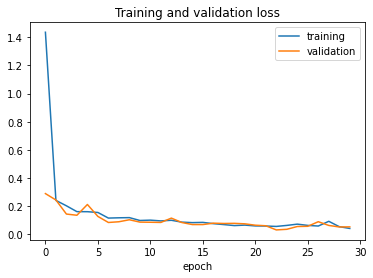

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

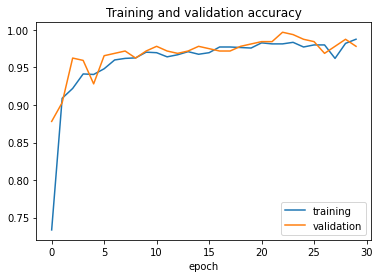

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss {}:'.format(test_acc,test_loss))

In [ ]:
#test your model with some images from your local computer to predict whether a patient is affected by COVID19 or not.
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  print(path)
  img = image.load_img(path , target_size=(150,150))
  x = image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(fn)
  if classes==0:
    print('Covid19')
  else:
    print('Normal')

Saving normal.jpg to normal.jpg
Saving covid.jpg to covid.jpg
/content/normal.jpg
normal.jpg
Normal
/content/covid.jpg
covid.jpg
Covid19


In [ ]:
model.save('covidmodel.h5')

In [ ]:
from google.colab import files 
files.download('covidmodel.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>